In [238]:
import numpy as np
import pandas as pd
import re
import scipy.stats as stats

import pylab 

In [242]:
def linear_regression(X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    b = np.linalg.inv(X.T@X)@X.T@y
    return b

def rmse(slopes, X_test, y_test):
    X_test = pd.get_dummies(X_test, drop_first = True)._get_numeric_data().values
    intercept_col = np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
    X_test = np.hstack((intercept_col, X_test))
    
    y_val_pred = X_test @ b
    y_val = y_test.values
    return np.sqrt(((y_val - y_val_pred) ** 2).mean())
    
def train_test_split(frac, X, response = 'Volume Sold (Gallons)'):
    X_train = X.sample(frac = frac)
    X_test = X.drop(X_train.index, axis = 0)
    

    y_train = X_train[response]
    X_train = X_train.drop(['County','Area Name',response], axis = 1)
    
   
    y_test = X_test[response]
    X_test = X_test.drop(['County','Area Name',response], axis = 1)
    
    
    return X_train,X_test, y_train, y_test

def r2(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    
    y_val_pred = X @ b
    ss_res = ((y - y_val_pred) ** 2).sum()
    return 1 - (ss_res/ss_tot)

def qqplot(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    y_val_pred = X @ b

    stats.probplot(y - y_val_pred, dist="norm", plot=pylab)
    pylab.show()
def resid_vs_fit(b, X, y):
        X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    y_val_pred = X @ b
    resid 
    stats.probplot(y - y_val_pred, dist="norm", plot=pylab)
    pylab.show()


In [92]:
df = pd.read_csv("../data/iowaliquor.csv")
df_sample = pd.read_csv("../data/iowa-sample.csv")



/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
df_raw_employment = pd.read_csv("../data/Iowa_Quarterly_Census_of_Employment_and_Wage_data__Statewide_and_County_.csv")
df_raw_employment.fillna(0)

,Year,Quarter,Area Type,Area Name,Industry,Description,Locations,Month 1,Month 2,Month 3,Average Emp,Wages,Average Wage
0,2011,1,Statewide,Statewide,11,"Agriculture, Forestry, Fishing & Hunt",1921,14343.0,14504.0,14895.0,14581.0,1.204824e+08,8263.0
1,2011,1,Statewide,Statewide,21,"Mining, Quarrying, & Oil & Gas Extrac",186,1638.0,1811.0,1818.0,1756.0,1.679560e+07,9567.0
2,2011,1,Statewide,Statewide,22,Utilities,449,8330.0,8288.0,8328.0,8315.0,1.593543e+08,19164.0
3,2011,1,Statewide,Statewide,23,Construction,8994,52324.0,51154.0,53629.0,52369.0,5.506093e+08,10514.0
4,2011,1,Statewide,Statewide,31,Manufacturing,3985,201803.0,202120.0,203641.0,202521.0,2.454029e+09,12117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500575,2020,1,County,Unspecified County,924,Administration of Environmental,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500576,2020,1,County,Unspecified County,925,Administration of Housing Program,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500577,2020,1,County,Unspecified County,926,Administration of Economic Progra,1,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500578,2020,1,County,Unspecified County,927,Space Research & Technology,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0


In [105]:
df_employement = pd.pivot_table(df_raw_employment,
               index = ["Year", "Quarter", "Area Name"],
               values = ["Average Emp", "Wages"],
               aggfunc = np.sum
              ).reset_index()

df_employement["Area Name"] = df_employement["Area Name"].str.lower()

In [109]:
df_employement["Year"] = df_employement["Year"].astype('str')
df_employement["Quarter"] = df_employement["Quarter"].astype('str')

In [106]:
df["County"] = df["County"].str.lower()

In [107]:
df["Year"] = pd.DatetimeIndex(df['Date']).year
df["Quarter"] = pd.DatetimeIndex(df['Date']).quarter

In [108]:
df["Year"] = df["Year"].astype('str')
df["Quarter"] = df["Quarter"].astype('str')
df["Pack"] = df["Pack"].astype('str')

In [121]:
GROUP_VARIABLES = ['County','Year','Quarter']
NUMERIC_VARIABLES = ['Bottle Volume (ml)','State Bottle Cost', 'State Bottle Retail',
                     'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']

df_agg =  pd.pivot_table(df, 
                        index = GROUP_VARIABLES,
                        values = NUMERIC_VARIABLES,
                        aggfunc = np.sum).reset_index().merge(df_employement, 'inner', left_on = ['Year','County', 'Quarter'], right_on = ['Year','Area Name', 'Quarter']).dropna()

In [130]:
X_train,X_test, y_train, y_test = train_test_split(.5, df_agg,"Sale (Dollars)")

In [133]:
X_train

,Year,Quarter,Bottle Volume (ml),Bottles Sold,State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Average Emp,Wages
670,2013,2,2457425,10561,22965.77,34529.41,2841.27,10757.39,11447.0,9.040754e+07
1860,2013,4,959150,6938,8931.04,13442.20,1165.74,4411.56,4258.0,3.542102e+07
1020,2018,2,1881865,15256,18870.48,28309.98,4322.49,16360.63,6668.0,6.263536e+07
2010,2018,2,2403545,21627,27136.10,40709.76,5375.90,20347.70,14154.0,1.372778e+08
266,2012,3,4353077,29717,40469.37,60852.63,8344.33,31587.19,16797.0,1.452808e+08
...,...,...,...,...,...,...,...,...,...,...
1866,2015,2,793575,6972,7949.22,11939.70,995.28,3765.13,4126.0,3.476315e+07
2878,2019,3,638325,3944,6871.24,10308.23,933.28,3545.37,2653.0,2.678222e+07
195,2019,3,2778695,23130,29251.76,43883.48,5505.17,20900.22,10985.0,1.050366e+08
982,2017,1,13768025,155016,149589.29,224416.47,38481.51,145654.05,113542.0,1.227052e+09


In [197]:
DEP_VARS = ["Year","Quarter","Average Emp", "Wages"]

In [198]:
b = linear_regression(X_train[DEP_VARS], y_train)

In [199]:
pd.get_dummies(X_train[DEP_VARS],drop_first = True)._get_numeric_data()

,Average Emp,Wages,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Quarter_2,Quarter_3,Quarter_4
670,11447.0,9.040754e+07,1,0,0,0,0,0,0,0,1,0,0
1860,4258.0,3.542102e+07,1,0,0,0,0,0,0,0,0,0,1
1020,6668.0,6.263536e+07,0,0,0,0,0,1,0,0,1,0,0
2010,14154.0,1.372778e+08,0,0,0,0,0,1,0,0,1,0,0
266,16797.0,1.452808e+08,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,4126.0,3.476315e+07,0,0,1,0,0,0,0,0,1,0,0
2878,2653.0,2.678222e+07,0,0,0,0,0,0,1,0,0,1,0
195,10985.0,1.050366e+08,0,0,0,0,0,0,1,0,0,1,0
982,113542.0,1.227052e+09,0,0,0,0,1,0,0,0,0,0,0


In [214]:
r2(b, X_train[DEP_VARS], y_train)

0.9722455149131427

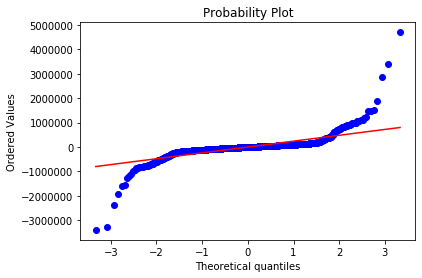

In [243]:
qqplot(b, X_train[DEP_VARS], y_train)